<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Clustering-agglomératif" data-toc-modified-id="Clustering-agglomératif-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Clustering agglomératif</a></span></li></ul></div>

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

In [4]:
df=pd.read_csv("airline_satisfaction_final.csv", index_col = 0,
nrows=50
)

In [5]:
df.head()

,Age,Flight Distance,Departure Delay in Minutes,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco Plus,satisfaction_satisfied,Inflight wifi service,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0.076923,0.086632,0.015704,1.0,1.0,0.0,0.0,1.0,0.0,0.6,...,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0
1,0.230769,0.041195,0.000628,1.0,0.0,1.0,1.0,0.0,0.0,0.6,...,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2
2,0.243590,0.224354,0.000000,0.0,1.0,1.0,1.0,0.0,1.0,0.4,...,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0
3,0.230769,0.107229,0.006910,0.0,1.0,1.0,1.0,0.0,0.0,0.4,...,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4
4,0.692308,0.036955,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,0.6,...,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6


In [6]:
df.shape

(50, 23)

In [7]:
df.columns

Index(['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Gender_Male',
       'Customer Type_Loyal Customer', 'Type of Travel_Business travel',
       'Class_Business', 'Class_Eco Plus', 'satisfaction_satisfied',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

In [8]:
X = df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Gender_Male',
       'Customer Type_Loyal Customer', 'Type of Travel_Business travel',
       'Class_Business', 'Class_Eco Plus',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness','satisfaction_satisfied']]

## Clustering agglomératif

In [9]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [11]:
clustering = AgglomerativeClustering(n_clusters=3, metric='manhattan', linkage='complete')
assignment = clustering.fit_predict(X)

In [12]:
clustering.labels_

array([1, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 1,
       1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 0, 2, 2,
       2, 2, 1, 0, 2, 1])

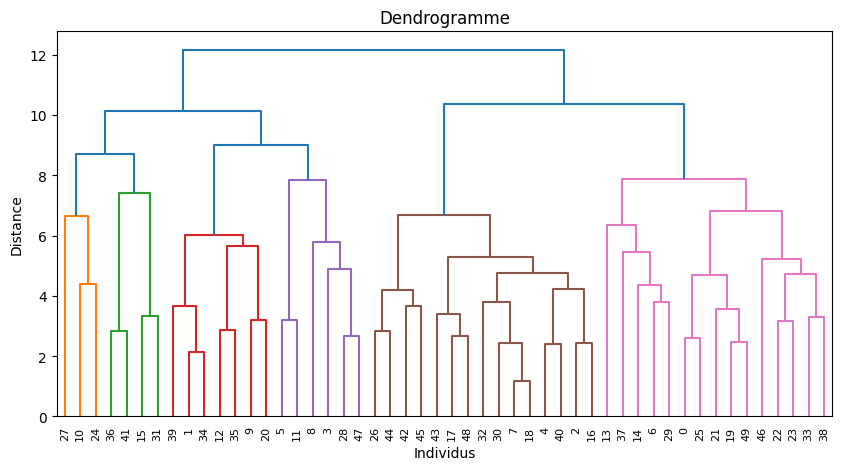

In [13]:
linkage_matrix = linkage(X, method='complete', metric='cityblock')

# Tracé du dendrogramme
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogramme')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.show()

In [14]:
from scipy.cluster.hierarchy import fcluster

# Seuil pour la formation des clusters
threshold = 7  # Ajustez ce seuil selon vos besoins

# Assignation des clusters en fonction du seuil
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

# Affichage des répartitions des features pour chaque cluster
for cluster_num in range(1, max(clusters) + 1):
    print(f'Cluster {cluster_num}:')
    for i, cluster_label in enumerate(clusters):
        if cluster_label == cluster_num:
            print(f'Feature {i + 1}')  # Index des features, commence généralement à 1
    print()

Cluster 1:
Feature 11
Feature 25
Feature 28

Cluster 2:
Feature 37
Feature 42

Cluster 3:
Feature 16
Feature 32

Cluster 4:
Feature 2
Feature 10
Feature 13
Feature 21
Feature 35
Feature 36
Feature 40

Cluster 5:
Feature 6
Feature 12

Cluster 6:
Feature 4
Feature 9
Feature 29
Feature 48

Cluster 7:
Feature 3
Feature 5
Feature 8
Feature 17
Feature 18
Feature 19
Feature 27
Feature 31
Feature 33
Feature 41
Feature 43
Feature 44
Feature 45
Feature 46
Feature 49

Cluster 8:
Feature 7
Feature 14
Feature 15
Feature 30
Feature 38

Cluster 9:
Feature 1
Feature 20
Feature 22
Feature 23
Feature 24
Feature 26
Feature 34
Feature 39
Feature 47
Feature 50



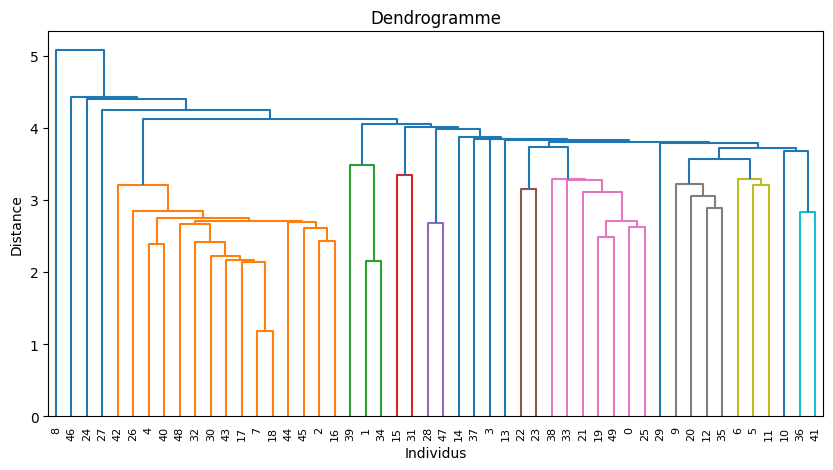

In [15]:
linkage_matrix = linkage(X, method='single', metric='cityblock')

# Tracé du dendrogramme
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogramme')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.show()

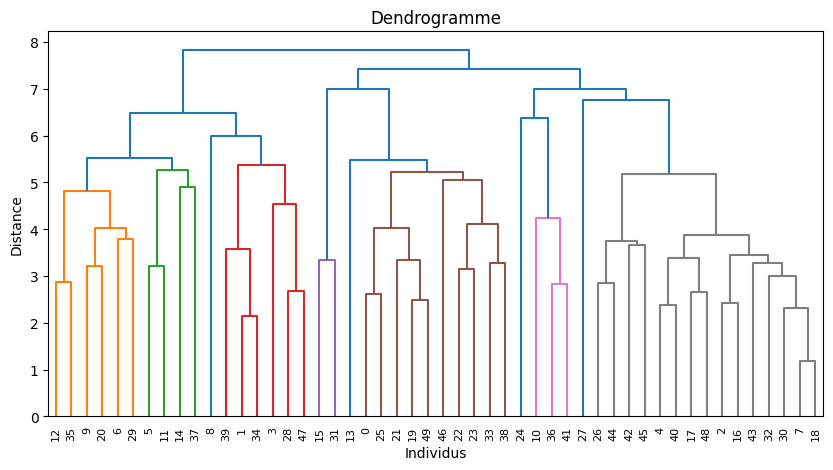

In [16]:
linkage_matrix = linkage(X, method='average', metric='cityblock')

# Tracé du dendrogramme
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogramme')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.show()